# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Berwyn Izzut Taghyir
- **Email:** wynz.it@gmail.com
- **ID Dicoding:** MC006D5Y2292

## Menentukan Pertanyaan Bisnis

- Bagaimana persebaran pembelian produk di tiap harinya?
- Bagaimana tren penjualan produk per bulannya?

## Import Semua Packages/Library yang Digunakan

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

## Data Wrangling

### Gathering Data

In [3]:
customer_df=pd.read_csv('Data\customers_dataset.csv')
geo_df=pd.read_csv('Data\geolocation_dataset.csv')
order_items_df=pd.read_csv('Data\order_items_dataset.csv')
order_payments_df=pd.read_csv('Data\order_payments_dataset.csv')
order_review_df=pd.read_csv('Data\order_reviews_dataset.csv')
orders_df=pd.read_csv('Data\orders_dataset.csv')
product_cat_df=pd.read_csv('Data\product_category_name_translation.csv')
products_df=pd.read_csv('Data\products_dataset.csv')
sellers_df=pd.read_csv('Data\sellers_dataset.csv')

In [4]:
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
product_cat_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Dataset tersebut merupakan dataset tentang e-Commerce yang jika diamati pada kolom kotanya merupakan dataset e-Commerce pada negara Brazil.
- Terdapat 9 Dataset yang masing masingnya dapat dihubungkan melalui kode unik seperti customer_id, order_id, zip_code_prefix, dsb. Dari dataset-dataset tersebut mengandung informasi unik masing masing sesuai dengan nama datasetnya. Hal ini memungkinkan untuk melakukan analisis pada ke 9 dataset dengan menggabungkan semua dataset.

### Assessing Data

#### Customers

In [13]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
customer_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [15]:
customer_df.duplicated().sum()

np.int64(0)

In [16]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Data Customers memiliki 99441 entri/baris dan memiliki 5 kolom. Data ini terdiri dari 1 kolom bertipe integer dan juga 4 kolom bertipe object.
- Data Customers tidak memiliki missing value pada setiap kolom dan tidak memiliki data yang terduplikasi. Ini artinya datanya sudah cukup untuk dilakukan analisis data karena data sudah cukup bersih/lengkap.

#### Geolocation

In [17]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [18]:
geo_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [19]:
geo_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [20]:
geo_df.duplicated().sum()

np.int64(261831)

**Insight:**
- Data Geolocation memiliki 1000163 entri/baris dan memiliki 5 kolom. Data ini terdiri dari 3 kolom bertipe numerik dan juga 2 kolom bertipe object. 
- Data Geolocation tidak memiliki missing value pada setiap kolom dan tidak memiliki data yang terduplikasi. Ini artinya datanya sudah cukup untuk dilakukan analisis data karena data sudah cukup bersih/lengkap.

#### Order Items

In [21]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [22]:
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [23]:
order_items_df.duplicated().sum()

np.int64(0)

In [24]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Data Order Items memiliki 112650 entri/baris dan memiliki 7 kolom. Data ini terdiri dari 3 kolom bertipe numerik dan juga 4 kolom bertipe object. 
- Data Order Items tidak memiliki missing value pada setiap kolom dan tidak memiliki data yang terduplikasi. Ini artinya datanya sudah cukup untuk dilakukan analisis data karena data sudah cukup bersih/lengkap.

#### Order Payments

In [25]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [26]:
order_payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [27]:
order_payments_df.duplicated().sum()

np.int64(0)

In [28]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- Data Order Payments memiliki 103886 entri/baris dan memiliki 5 kolom. Data ini terdiri dari 3 kolom bertipe numerik dan juga 2 kolom bertipe object. 
- Data Order Payments tidak memiliki missing value pada setiap kolom dan tidak memiliki data yang terduplikasi. Ini artinya datanya sudah cukup untuk dilakukan analisis data karena data sudah cukup bersih/lengkap.

#### Order Reviews

In [29]:
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [30]:
order_review_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [31]:
order_review_df.duplicated().sum()

np.int64(0)

In [32]:
order_review_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- Data Order Reviews memiliki 99224 entri/baris dan memiliki 7 kolom. Data ini terdiri dari 1 kolom bertipe integer dan juga 6 kolom bertipe object. 
- Data Order Reviews memiliki missing value pada kolom review_comment_title sebanyak 87656 dan review_comment_message sebanyak 58247. Ini mungkin dikarenakan banyak customer yang tidak memberikan review pemesanan saat pembelian. Namun, data ini tidak memiliki data yang terduplikasi sehingga pada data Order Reviews cukup mengatasi missing values saja.

#### Orders

In [33]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [34]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [35]:
orders_df.duplicated().sum()

np.int64(0)

In [36]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Data Orders memiliki 99441 entri/baris dan memiliki 8 kolom. Data ini terdiri dari 8 kolom bertipe object. 
- Data Orders memiliki missing values pada kolom order_approved_at sebanyak 160, order_delivered_carrier_date sebanyak 1783, dan order_delivered_customer_date sebanyak 2965. Hal ini mungkin disebabkan karena operator/kurir yang terlewat saat melakukan rekap pemesanan. Namun, data ini tidak memiliki data yang terduplikasi sehingga cukup mengatasi missing values saja.

#### Product Category

In [37]:
product_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [38]:
product_cat_df.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [39]:
product_cat_df.duplicated().sum()

np.int64(0)

In [40]:
product_cat_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Products

In [41]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [42]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [43]:
products_df.duplicated().sum()

np.int64(0)

In [44]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Sellers

In [45]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [46]:
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [47]:
sellers_df.duplicated().sum()

np.int64(0)

In [48]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

#### Order Items

In [49]:
order_items_df['shipping_limit_date']=pd.to_datetime(order_items_df['shipping_limit_date'])

**Insight:**
- Merubah kolom tanggal menjadi format datetime agar memungkinkan melakukan analisis time-series nantinya

#### Order Reviews

In [50]:
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [51]:
# Mengonversi kolom tanggal yang masih bertipe object.
order_review_df['review_creation_date']=pd.to_datetime(order_review_df['review_creation_date'])
order_review_df['review_answer_timestamp']=pd.to_datetime(order_review_df['review_answer_timestamp'])

In [52]:
# Mengisi kolom review_comment_title dan review_comment_message dengan 'Not Given' jika kosong.
order_review_df["review_comment_title"] = order_review_df["review_comment_title"].fillna("Not Given")
order_review_df["review_comment_message"] = order_review_df["review_comment_message"].fillna("Not Given")

In [53]:
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Not Given,Not Given,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Not Given,Not Given,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Not Given,Not Given,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Not Given,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Not Given,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


**Insight:**
- Dengan data tanggal yang sudah memiliki format datetime yang benar maka akan memungkinkan untuk melakukan analisis time-series nantinya.
- Pada order_review terdapat konsumen yang sengaja hanya memberikan review_score namun tidak memberi komentar apapun. Hal ini mengakibatkan kolom review_comment_title dan review_comment_message tidak bisa dihapus karena mengandung data tentang skor dari masing-masing konsumen. Oleh karena itu, nilai NaN pada 2 kolom review tadi akan diisi dengan 'Not Given' yang menandakan konsumen memang tidak mengisi kolom review tersebut

#### Orders

In [54]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [55]:
# Mengonversi kolom tanggal yang masih bertipe object.
orders_df['order_purchase_timestamp']=pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at']=pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_customer_date']=pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date']=pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [56]:
orders_df[orders_df['order_approved_at'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaN,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaN,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaN,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaN,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaN,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaN,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaN,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaN,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaN,NaT,2018-10-01


In [57]:
orders_df[orders_df['order_approved_at'].isnull() & (orders_df['order_status']=='canceled')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaN,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaN,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaN,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaN,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaN,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaN,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaN,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaN,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaN,NaT,2018-10-01


In [58]:
orders_df[orders_df['order_approved_at'].isnull() & (orders_df['order_status']=='delivered')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [59]:
# Menghapus data jika pemesanan dibatalkan
orders_df=orders_df.dropna(subset=['order_approved_at'], how='all')[orders_df['order_status']!='canceled']

In [60]:
orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'], inplace=True)

In [61]:
orders_df[orders_df['order_delivered_customer_date'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaN,NaT,2018-01-19
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaT,2018-02-06
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaT,2018-02-06
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaT,2017-09-15


In [62]:
orders_df['order_delivered_customer_date'].fillna(orders_df['order_estimated_delivery_date'], inplace=True)

In [63]:
orders_df['order_delivered_carrier_date'].fillna(orders_df['order_approved_at'] + pd.Timedelta(days=7), inplace=True)

In [64]:
orders_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

**Insight:**
- Merubah kolom tanggal dalam format datetime agar memungkinkan untuk melakukan analisis time-series nantinya.
- Setelah diamati, ternyata kolom order_approved_at memuat NaN dikarenakan customer telah membatalkan transaksi tersebut. Sehingga karena yang akan dianalisis nantinya merupakan data yang telah diproses data data konsumen yang membatalkan pesanan dapat dihapus saja. Dalam kasus lain, jika status pemesanan sudah Delivered maka pesanan tersebut akan dianggap telah disetujui oleh seller saat pembeli melakukan pembayaran.
- Selanjutnya, untuk missing value pada tanggal terkirim akan diisi dengan estimasi terkirim karena status pemesanan sudah delivered
- Dan untuk tanggal telah terkirim pada kurir akan diisi 7 hari setelah persetujuan dari seller.

#### Products

In [65]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [66]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [67]:
products_df[products_df['product_category_name'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [68]:
products_df.dropna(subset=['product_category_name','product_name_lenght','product_description_lenght','product_photos_qty'], how='all', inplace=True)

In [69]:
products_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [70]:
products_df[products_df['product_weight_g'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN


In [71]:
products_df[(products_df['product_category_name']=='bebes') & (products_df['product_name_lenght']==60.0) & (products_df['product_description_lenght']==865.0)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1294,6fd08d44046ab994b96ff38ad6fcfba1,bebes,60.0,865.0,1.0,500.0,23.0,23.0,23.0
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN


In [72]:
products_df[(products_df['product_category_name']=='bebes') & (products_df['product_name_lenght']==60.0) & (products_df['product_description_lenght']==865.0)]=products_df[(products_df['product_category_name']=='bebes') & (products_df['product_name_lenght']==60.0) & (products_df['product_description_lenght']==865.0)].fillna(method='ffill')

In [73]:
products_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**
- Untuk data yang tidak mengandung nama produk bisa dihapus karena tidak memberikan informasi apapun mengenai produk tersebut.
- Selain itu jika terdapat produk yang memiliki nama produk yang sama dan spesifikasi produk yang sama bisa diisi dengan menggunakan data produk yang lengkap agar tidak bias.

## Exploratory Data Analysis (EDA)

### Explore Customers dan Orders

In [74]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [75]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [76]:
customer_df.groupby(by='customer_city')['customer_unique_id'].nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                14984
rio de janeiro            6620
belo horizonte            2672
brasilia                  2069
curitiba                  1465
campinas                  1398
porto alegre              1326
salvador                  1209
guarulhos                 1153
sao bernardo do campo      908
Name: customer_unique_id, dtype: int64

In [77]:
orders_customers_df=pd.merge(
    left=customer_df,
    right=orders_df,
    left_on='customer_id',
    right_on='customer_id',
    how='left'
)
orders_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [78]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15398
1,rio de janeiro,6832
2,belo horizonte,2756
3,brasilia,2123
4,curitiba,1511
5,campinas,1433
6,porto alegre,1374
7,salvador,1241
8,guarulhos,1176
9,sao bernardo do campo,930


In [79]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    41413
RJ    12763
MG    11568
RS     5438
PR     5022
SC     3618
BA     3364
DF     2132
ES     2024
GO     2007
PE     1647
CE     1328
PA      971
MT      905
MA      742
MS      713
PB      534
PI      491
RN      485
AL      412
SE      349
TO      279
RO      250
AM      148
AC       81
AP       68
RR       45
Name: order_id, dtype: int64

In [80]:
orders_customers_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96464
shipped         1107
unavailable      609
invoiced         314
processing       301
approved           2
Name: order_id, dtype: int64

**Insight:**
- Berdasarkan data customers_dataset diperoleh bahwa customer terbanyak berada di kota Sao Paulo, disusul dengan Rio de Janeiro, Belo Horizonte, Brasilia, dan Curitiba.
- Sao Paulo memiliki jumlah order tertinggi (15.398), jauh melampaui kota lainnya, menunjukkan potensi pasar yang besar dan perlunya strategi pemasaran yang lebih intensif di kota ini, sementara kota dengan order lebih rendah seperti São Bernardo do Campo dapat menjadi target ekspansi melalui promosi atau peningkatan layanan.
- Sebagian besar pesanan telah terkirim (delivered) dengan total 96464 order, menunjukkan bahwa sistem logistik dan pengiriman berjalan dengan baik. Namun, masih terdapat 1107 order dalam status 'shipped' yang berarti dalam perjalanan ke pelanggan. Selain itu ada beberapa order yang mengalami kendala 'unavailable' sebanyak 609. Terdapat juga status pemesanan 'invoiced' sebanyak 314, 'processing' sebanyak 301, dan 'approved' sebanyak 2.


### Explore Products, Product Category, dan Order

In [81]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000
mean,48.476949,771.495285,2.188986,2276.901642,30.854303,16.958999,23.208590
std,10.245741,635.115225,1.736766,4279.237091,16.955759,13.635946,12.078576
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [82]:
product_cat_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [83]:
order_items_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


In [84]:
orders_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date
count,98797,98797,98797,98797
mean,2017-12-31 12:22:02.864570624,2017-12-31 22:45:56.718817280,2018-01-13 09:02:04.339959808,2018-01-24 06:55:01.970707456
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,2017-09-12 19:07:38,2017-09-13 03:36:06,2017-09-23 15:43:21,2017-10-04 00:00:00
50%,2018-01-18 22:28:13,2018-01-19 10:55:34,2018-02-01 19:10:19,2018-02-15 00:00:00
75%,2018-05-04 14:46:54,2018-05-04 21:35:13,2018-05-15 17:17:07,2018-05-25 00:00:00
max,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-10-17 13:22:46,2018-10-25 00:00:00


In [85]:
product_order=pd.merge(
    left=orders_df,
    right=order_items_df,
    on='order_id',
    how='left'
).merge(
    products_df,
    on='product_id'
).merge(
    product_cat_df,
    on='product_category_name'
)
product_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


In [86]:
product_order.groupby(by='product_category_name_english')['order_id'].nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           9398
health_beauty            8800
sports_leisure           7671
computers_accessories    6654
furniture_decor          6422
housewares               5847
watches_gifts            5604
telephony                4182
auto                     3873
toys                     3855
Name: order_id, dtype: int64

In [111]:
product_order.groupby(by='product_category_name_english')['price'].sum().sort_values(ascending=False).reset_index().head(10)

,product_category_name_english,price
0,health_beauty,1255695.13
1,watches_gifts,1198185.21
2,bed_bath_table,1035830.07
3,sports_leisure,979671.94
4,computers_accessories,904322.02
5,furniture_decor,727209.45
6,housewares,626825.80
7,cool_stuff,620595.42
8,auto,586620.73
9,garden_tools,480874.94


**Insight:**
- Kategori 'bed_bath_table' menjadi produk terlaris, menunjukkan tingginya permintaan untuk perlengkapan rumah tangga. 'health_beauty' (8.800 pemesanan) dan 'sports_leisure' (7.671 order) juga memiliki volume order yang besar, menandakan minat konsumen yang tinggi terhadap produk kesehatan dan gaya hidup aktif. Selain itu, 'computers_accessories' dan 'furniture_decor' secara berturut-turut menjadi produk terlaris ke-4 dan ke-5 yang menandakan minat konsumen terhadap aksesori elektronik untuk komputer dan furnitur dekorasi juga cukup tinggi. Ini menjadikan 5 produk tersebut menjadi produk terlaris.
- Walaupun 'bed_bath_table' merupakan produk terlaris tapi ternyata produk 'health_beauty' mencatat total nilai penjualan tertinggi yang menandakan produk kesehatan dan kecantikan memiliki permintaan yang kuat dengan kemungkinan margin keuntungan yang tinggi. 'watches_gifts" berada di posisi kedua (1.198.185,21), meskipun jumlah ordernya lebih rendah dibandingkan beberapa kategori lain, mengindikasikan bahwa produk dalam kategori ini mungkin memiliki harga rata-rata yang lebih tinggi. Sementara itu, "bed_bath_table" (1.035.830,07) dan "sports_leisure" (979.671,94) juga menunjukkan performa penjualan yang kuat.

#### Explore Seller, Order Review, dan Order Items

In [88]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [89]:
seller_order=pd.merge(
    left=orders_df,
    right=order_items_df,
    on='order_id',
    how='left'
).merge(
    sellers_df,
    on='seller_id',
    how='left'
).merge(
    order_review_df,
    on='order_id',
    how='left'
)
seller_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,8.72,9350.0,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,Not Given,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,22.76,31570.0,belo horizonte,SP,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,19.22,14840.0,guariba,SP,e73b67b67587f7644d5bd1a52deb1b01,5.0,Not Given,Not Given,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,31842.0,belo horizonte,MG,359d03e676b3c069f62cadba8dd3f6e8,5.0,Not Given,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,8752.0,mogi das cruzes,SP,e50934924e227544ba8246aeb3770dd4,5.0,Not Given,Not Given,2018-02-17,2018-02-18 13:02:51


In [90]:
seller_order.groupby(by='seller_id').agg({
    'order_id': 'count',
    'review_score': ['mean', 'min', 'max']
}).sort_values(by=('order_id', 'count'), ascending=False).head(10)

order_id review_score          
                                    count         mean  min  max
seller_id                                                       
6560211a19b47992c3666cc44a7e94c0     2031     3.920477  1.0  5.0
4a3ca9315b744ce9f8e9374361493884     2007     3.804743  1.0  5.0
1f50f920176fa81dab994f9023523100     1939     3.983946  1.0  5.0
cc419e0650a3c5ba77189a1882b7556a     1810     4.083796  1.0  5.0
da8622b14eb17ae2831f4ac5b9dab84a     1574     4.071429  1.0  5.0
955fee9216a65b617aa5c0531780ce60     1500     4.053763  1.0  5.0
1025f0e2d44d7041d6cf58b6550e0bfa     1443     3.849755  1.0  5.0
7c67e1448b00f6e969d365cea6b010ab     1375     3.348208  1.0  5.0
ea8482cd71df3c1969d7b9473ff13abc     1203     3.955686  1.0  5.0
7a67c85e85bb2ce8582c35f2203ad736     1171     4.234940  1.0  5.0

In [91]:
seller_order.groupby(by='seller_id')['price'].sum().sort_values(ascending=False).head(10)

seller_id
4869f7a5dfa277a7dca6462dcf3b52b2    229237.63
53243585a1d6dc2643021fd1853d8905    222776.05
4a3ca9315b744ce9f8e9374361493884    202852.32
fa1c13f2614d7b5c4749cbc52fecda94    192842.13
7c67e1448b00f6e969d365cea6b010ab    189417.67
7e93a43ef30c4f03f38b393420bc753a    172583.88
da8622b14eb17ae2831f4ac5b9dab84a    162723.37
7a67c85e85bb2ce8582c35f2203ad736    142055.53
1025f0e2d44d7041d6cf58b6550e0bfa    140513.14
955fee9216a65b617aa5c0531780ce60    135229.70
Name: price, dtype: float64

**Insight:**
- Seller dengan jumlah order tertinggi, seperti 6560211a19b47992c3666cc44a7e94c0 (2.031 order, rating 3.92), menunjukkan performa yang cukup baik, namun masih ada ruang perbaikan. Beberapa seller, seperti 4a3ca9315b744ce9f8e9374361493884 (2.007 order, rating 3.80), memiliki volume penjualan tinggi tetapi rating lebih rendah, yang dapat mengindikasikan masalah layanan atau produk. Sementara itu, seller 7a67c85e85bb2ce8582c35f2203ad736 memiliki rating tertinggi (4.23), menunjukkan kualitas layanan yang lebih baik. Perbedaan signifikan dalam rating minimum (1.0) dan maksimum (5.0) menunjukkan variasi pengalaman pelanggan. Fokus pada peningkatan layanan dan kecepatan pengiriman dapat membantu meningkatkan kepuasan pelanggan dan optimasi performa seller.
- Seller 4869f7a5dfa277a7dca6462dcf3b52b2 mencatat total penjualan tertinggi sebesar 229.237,63, diikuti oleh 53243585a1d6dc2643021fd1853d8905 dengan 222.776,05. Sementara itu, seller 7a67c85e85bb2ce8582c35f2203ad736, yang sebelumnya memiliki rating tertinggi (4.23), memiliki total penjualan lebih rendah, yaitu 142.055,53, menunjukkan bahwa jumlah penjualan tidak selalu berbanding lurus dengan kepuasan pelanggan. Seller dengan volume penjualan besar tetapi rating rendah, seperti 7c67e1448b00f6e969d365cea6b010ab (189.417,67), perlu meningkatkan kualitas layanan untuk mempertahankan pelanggan dan meningkatkan loyalitas.

In [92]:
final_df=orders_df.merge(
    customer_df, on="customer_id", how='left'
    ).merge(
        order_items_df, on="order_id", how='left'
        ).merge(
            products_df, on="product_id", how='left'
            ).merge(
                product_cat_df, on="product_category_name", how='left'
                ).merge(
                    order_payments_df, on="order_id", how='left'
                    ).merge(
                        sellers_df, on="seller_id", how='left'
                        ).merge(
                            order_review_df, on="order_id", how='left'
                            )
final_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.12,9350.0,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,Not Given,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.00,9350.0,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,Not Given,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.59,9350.0,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,Not Given,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,141.46,31570.0,belo horizonte,SP,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,179.12,14840.0,guariba,SP,e73b67b67587f7644d5bd1a52deb1b01,5.0,Not Given,Not Given,2018-08-18,2018-08-22 19:07:58


In [105]:
final_df['order_delivered_carrier_date']=pd.to_datetime(final_df['order_delivered_carrier_date'])

In [106]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118373 entries, 0 to 118372
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118373 non-null  object        
 1   customer_id                    118373 non-null  object        
 2   order_status                   118373 non-null  object        
 3   order_purchase_timestamp       118373 non-null  datetime64[ns]
 4   order_approved_at              118373 non-null  datetime64[ns]
 5   order_delivered_carrier_date   118373 non-null  datetime64[ns]
 6   order_delivered_customer_date  118373 non-null  datetime64[ns]
 7   order_estimated_delivery_date  118373 non-null  datetime64[ns]
 8   customer_unique_id             118373 non-null  object        
 9   customer_zip_code_prefix       118373 non-null  int64         
 10  customer_city                  118373 non-null  object        
 11  

In [107]:
final_df.to_csv('Dashboard/main_data.csv')

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana persebaran pembelian produk di tiap harinya?

In [94]:
order_days=final_df.groupby(final_df['order_purchase_timestamp'].dt.day_name())['order_id'].count().reset_index()
order_days.rename(columns={"order_id":"Total Orders", "order_purchase_timestamp": "Day"}, inplace=True)
order_days.sort_values(by='Total Orders', ascending=False)

,Day,Total Orders
1,Monday,19234
5,Tuesday,19182
6,Wednesday,18528
4,Thursday,17698
0,Friday,16914
3,Sunday,14016
2,Saturday,12801


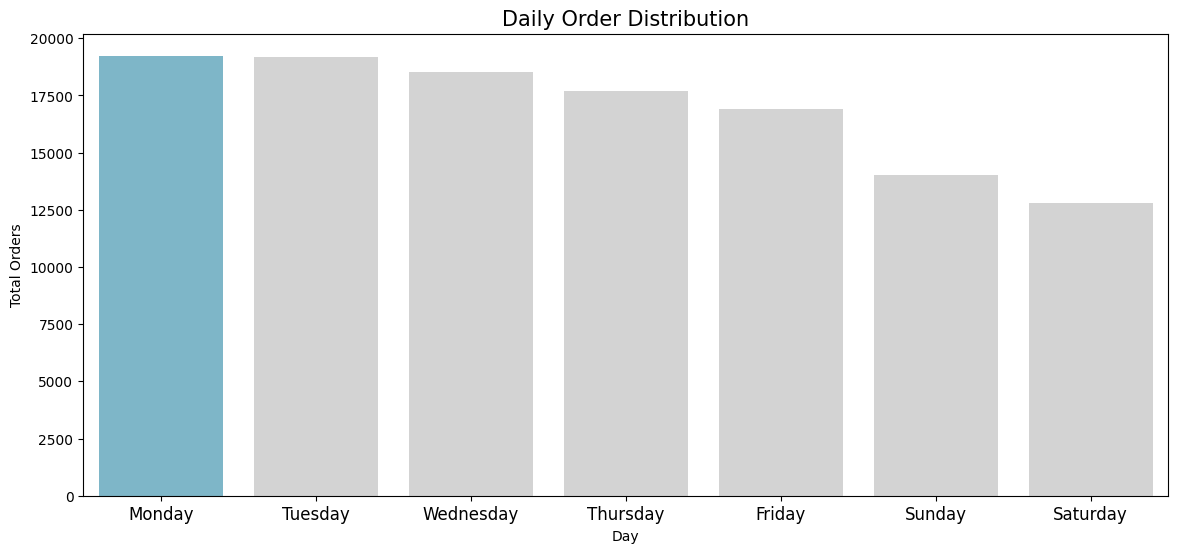

In [95]:
plt.figure(figsize=(14,6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x='Day', y='Total Orders', data=order_days.sort_values(by='Total Orders', ascending=False),palette=colors)
plt.title("Daily Order Distribution", loc="center", fontsize=15)
plt.ylabel('Total Orders')
plt.xlabel('Day')
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: Bagaimana tren penjualan produk per bulannya?

In [96]:
final_df['purchase_months']=final_df['order_purchase_timestamp'].dt.to_period('M')

In [97]:
monthly_sales=final_df.groupby(['purchase_months', 'product_category_name_english']).size().reset_index(name='total_orders')
monthly_sales

,purchase_months,product_category_name_english,total_orders
0,2016-09,furniture_decor,2
1,2016-09,health_beauty,3
2,2016-10,air_conditioning,10
3,2016-10,audio,2
4,2016-10,auto,10
...,...,...,...
1246,2018-08,stationery,172
1247,2018-08,telephony,289
1248,2018-08,toys,165
1249,2018-08,watches_gifts,428


In [98]:
top_categories=monthly_sales.groupby('product_category_name_english')['total_orders'].sum().nlargest(3).index
top_categories

Index(['bed_bath_table', 'health_beauty', 'sports_leisure'], dtype='object', name='product_category_name_english')

In [99]:
monthly_sales_top=monthly_sales[monthly_sales['product_category_name_english'].isin(top_categories)]
monthly_sales

,purchase_months,product_category_name_english,total_orders
0,2016-09,furniture_decor,2
1,2016-09,health_beauty,3
2,2016-10,air_conditioning,10
3,2016-10,audio,2
4,2016-10,auto,10
...,...,...,...
1246,2018-08,stationery,172
1247,2018-08,telephony,289
1248,2018-08,toys,165
1249,2018-08,watches_gifts,428


In [100]:
monthly_sales_top['purchase_months'] = monthly_sales_top['purchase_months'].astype(str)
monthly_sales_top

,purchase_months,product_category_name_english,total_orders
1,2016-09,health_beauty,3
6,2016-10,bed_bath_table,8
22,2016-10,health_beauty,48
29,2016-10,sports_leisure,17
38,2017-01,bed_bath_table,51
...,...,...,...
1162,2018-07,health_beauty,805
1182,2018-07,sports_leisure,484
1194,2018-08,bed_bath_table,676
1226,2018-08,health_beauty,871


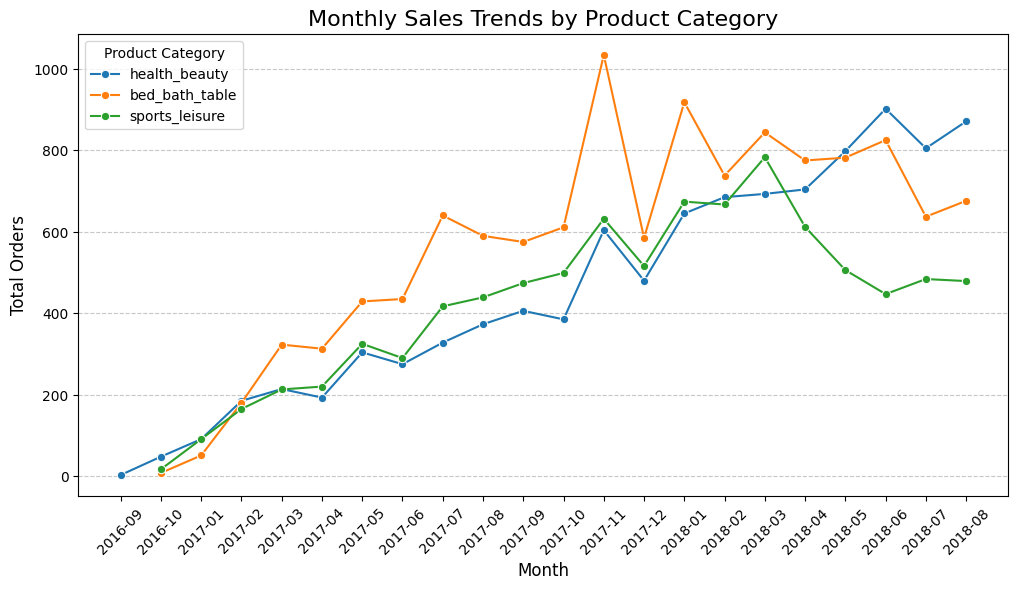

In [101]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_top, x='purchase_months', y='total_orders', hue='product_category_name_english', marker='o')

plt.xticks(rotation=45)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.title("Monthly Sales Trends by Product Category", fontsize=16)
plt.legend(title="Product Category")
plt.grid(axis='y', linestyle='--', alpha=0.7)

**Insight:**
- Grafik distribusi pesanan harian menunjukkan bahwa Senin dan Selasa merupakan hari dengan jumlah pesanan tertinggi, mengindikasikan bahwa pelanggan lebih aktif berbelanja di awal minggu. Sementara itu, jumlah pesanan cenderung menurun dari Rabu hingga Jumat, dengan akhir pekan (Sabtu dan Minggu) memiliki jumlah pesanan terendah. Pola ini dapat disebabkan oleh kebiasaan pelanggan yang lebih banyak berbelanja setelah akhir pekan atau adanya strategi promosi tertentu yang mendorong pembelian di awal minggu. Dari perspektif bisnis, tren ini dapat dimanfaatkan dengan menerapkan strategi promosi khusus pada akhir pekan untuk meningkatkan jumlah pesanan. Selain itu, penyesuaian campaign atau stok produk sesuai dengan pola belanja ini juga dapat membantu meningkatkan efisiensi operasional dan penjualan.
- Grafik tren penjualan bulanan berdasarkan kategori produk menunjukkan adanya peningkatan jumlah pesanan secara bertahap sejak tahun 2016 hingga awal 2018. Kategori bed_bath_table mengalami lonjakan pesanan yang signifikan di beberapa bulan, terutama pada akhir 2017 dan awal 2018, yang kemungkinan disebabkan oleh musim liburan atau kampanye promosi. Namun, setelah mencapai puncaknya, tren kategori ini mengalami fluktuasi dengan penurunan pada pertengahan 2018. Kategori health_beauty dan sports_leisure menunjukkan tren yang lebih stabil, dengan peningkatan pesanan yang konsisten dari waktu ke waktu. Namun, kategori sports_leisure mengalami penurunan yang cukup tajam setelah Maret 2018, menunjukkan kemungkinan berkurangnya minat pelanggan atau faktor eksternal seperti pergantian musim yang memengaruhi permintaan

## Analisis Lanjutan (Opsional)

### RFM Analysis

In [102]:
rfm_df = final_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,293
1,000161a058600d5901f007fab4c27140,1,54.90,414
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,552
3,0002414f95344307404f0ace7a26f1d5,1,149.90,383
4,000379cdec625522490c315e70c7a9fb,1,93.00,154


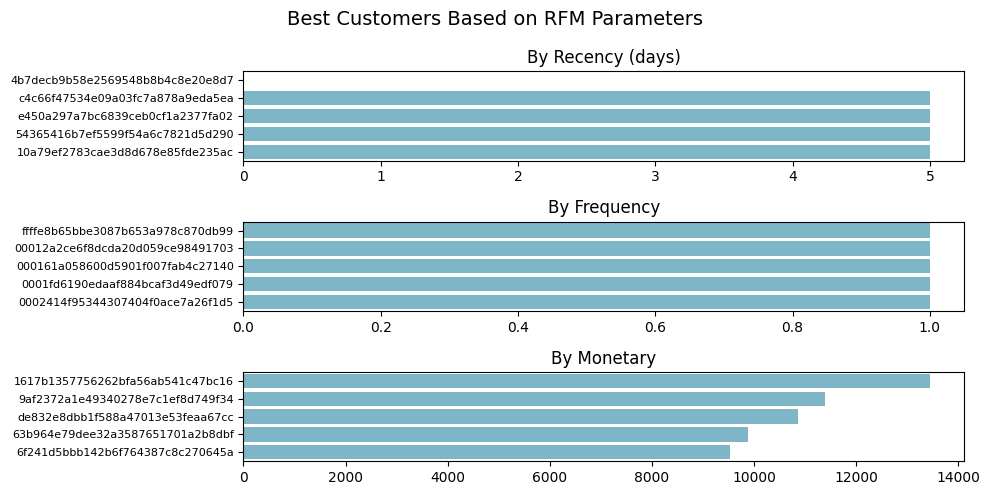

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 5))  

colors = ["#72BCD4"] * 5  


sns.barplot(x="recency", y="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), 
            palette=colors, ax=ax[0], orient='h')
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=12)
ax[0].tick_params(axis='y', labelsize=8)  

sns.barplot(x="frequency", y="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), 
            palette=colors, ax=ax[1], orient='h')
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=12)
ax[1].tick_params(axis='y', labelsize=8)

sns.barplot(x="monetary", y="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), 
            palette=colors, ax=ax[2], orient='h')
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=12)
ax[2].tick_params(axis='y', labelsize=8)

plt.suptitle("Best Customers Based on RFM Parameters", fontsize=14)
plt.tight_layout() 
plt.show()


## Conclusion

- Berdasarkan analisis distribusi pesanan harian, jumlah pesanan cenderung lebih tinggi pada hari kerja dibandingkan akhir pekan. Senin dan Selasa memiliki volume pesanan tertinggi, sedangkan Sabtu dan Minggu menunjukkan jumlah pesanan yang lebih rendah. Hal ini dapat mengindikasikan bahwa pelanggan lebih aktif berbelanja di awal pekan, kemungkinan karena kebiasaan belanja setelah akhir pekan atau kebutuhan mendesak setelah libur.
- Analisis tren penjualan bulanan menunjukkan adanya pertumbuhan pesanan yang konsisten sejak 2016 hingga 2018. Kategori produk tertentu, seperti bed_bath_table, mengalami lonjakan signifikan pada beberapa bulan, yang mungkin disebabkan oleh musim liburan atau kampanye promosi. Sebaliknya, beberapa kategori lain seperti sports_leisure menunjukkan tren penurunan setelah puncaknya, menandakan adanya faktor eksternal yang memengaruhi permintaan.